In [34]:
!pip uninstall prophet
!pip uninstall fbprophet  # If installed
!pip install prophet


Found existing installation: prophet 1.1.6
Uninstalling prophet-1.1.6:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/prophet-1.1.6.dist-info/*
    /usr/local/lib/python3.10/dist-packages/prophet.libs/libtbb-dc01d64d.so.2
    /usr/local/lib/python3.10/dist-packages/prophet.libs/libtbbmalloc-3c5a9b3b.so.2
    /usr/local/lib/python3.10/dist-packages/prophet/*
Proceed (Y/n)? y
  Successfully uninstalled prophet-1.1.6
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 78.7 MB/s eta 0:00:00


In [1]:
!pip install yfinance==0.1.70
!pip install yahoo-fin==0.8.9.1
!pip install mplfinance
!pip install pmdarima
!pip install fbprophet

  Using cached yahoo_fin-0.8.9.1-py3-none-any.whl.metadata (699 bytes)
  Using cached requests_html-0.10.0-py3-none-any.whl.metadata (15 kB)
  Using cached feedparser-6.0.11-py3-none-any.whl.metadata (2.4 kB)
  Using cached sgmllib3k-1.0.0.tar.gz (5.8 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.6 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=942a183064a60daa8edcb7a6393f6d8af688e5b873d9df052dc52047c5bcb3c8
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uni

In [3]:
!pip install prophet

In [4]:
# ipython-input-2-9bdafd8c9f45
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpdates
import seaborn as sns
import yfinance as yf
from yahoo_fin import stock_info

import datetime
from dateutil.parser import parse

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm
from pmdarima.arima.utils import ndiffs

# Changed import statement to use 'prophet' instead of 'fbprophet'
from prophet import Prophet
from prophet.plot import plot_plotly

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

[*********************100%***********************]  1 of 1 completed

DEBUG:cmdstanpy:input tempfile: /tmp/tmpetcy4aya/hvkahmhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpetcy4aya/eq4m680z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57398', 'data', 'file=/tmp/tmpetcy4aya/hvkahmhp.json', 'init=/tmp/tmpetcy4aya/eq4m680z.json', 'output', 'file=/tmp/tmpetcy4aya/prophet_modelf05zdey5/prophet_model-20241026142400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


14:24:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model trained and saved successfully as 'tesla_prophet_model_filtered.pkl'
Model loaded successfully


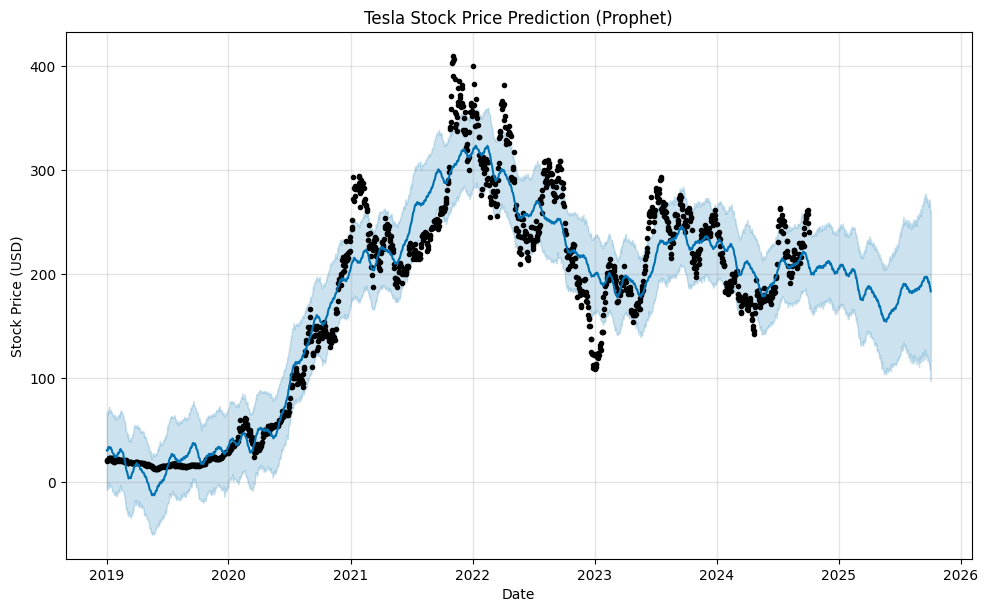

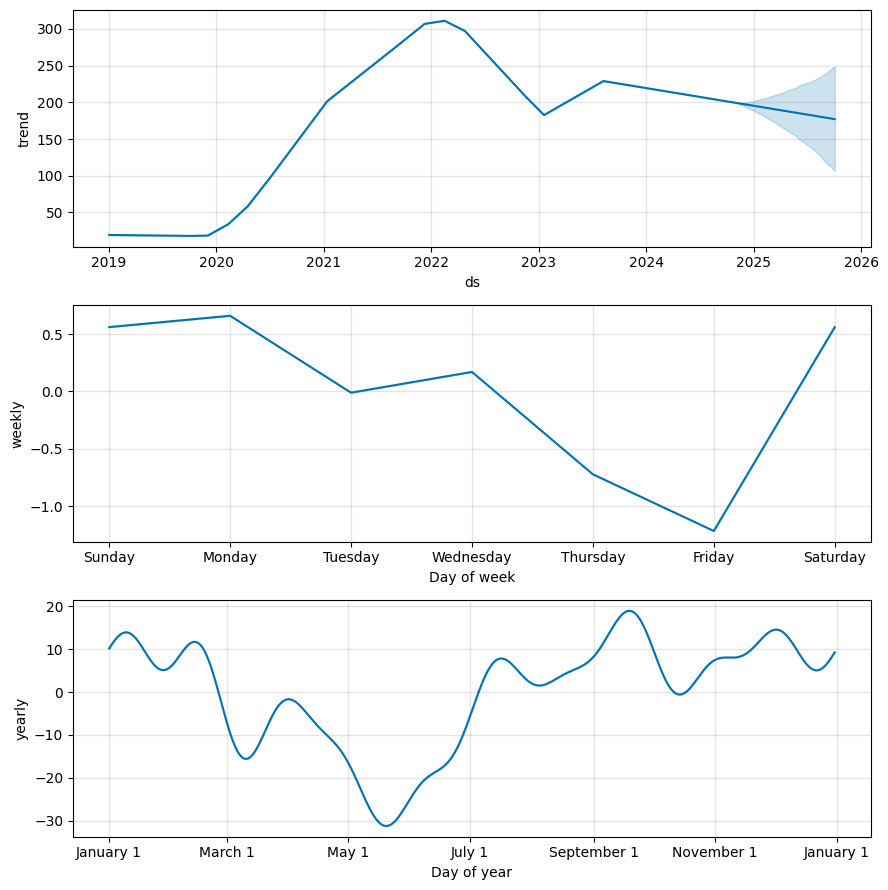

In [10]:
# Install necessary libraries
!pip install yfinance
!pip install prophet
import pickle
from datetime import datetime

# Import libraries
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch Tesla stock data
tesla_data = yf.download('TSLA', start='2019-01-01', end='2024-10-04')
tesla_data.reset_index(inplace=True)

# Step 2: Filter data up to October 4, 2024
cutoff_date = datetime.strptime('2024-10-04', '%Y-%m-%d')
tesla_data = tesla_data[tesla_data['Date'] <= cutoff_date]

# Step 3: Format data for Prophet
tesla_prophet_df = tesla_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Step 4: Initialize and fit the Prophet model with filtered data
tesla_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
tesla_model.fit(tesla_prophet_df)

# Step 5: Save the trained model
with open('tesla_prophet_model_filtered.pkl', 'wb') as f:
    pickle.dump(tesla_model, f)
print("Model trained and saved successfully as 'tesla_prophet_model_filtered.pkl'")

# Step 6: Load the model (if needed)
with open('tesla_prophet_model_filtered.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
print("Model loaded successfully")

# Step 7: Make future predictions (e.g., next 365 days) using the loaded model
future = loaded_model.make_future_dataframe(periods=365)
forecast = loaded_model.predict(future)

# Step 8: Plot the forecast
fig1 = loaded_model.plot(forecast)
plt.title("Tesla Stock Price Prediction (Prophet)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.show()

# Step 9: Plot the forecast components
fig2 = loaded_model.plot_components(forecast)
plt.show()


[*********************100%***********************]  1 of 1 completed

DEBUG:cmdstanpy:input tempfile: /tmp/tmpetcy4aya/f9wr826d.json


DEBUG:cmdstanpy:input tempfile: /tmp/tmpetcy4aya/35pi618y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16844', 'data', 'file=/tmp/tmpetcy4aya/f9wr826d.json', 'init=/tmp/tmpetcy4aya/35pi618y.json', 'output', 'file=/tmp/tmpetcy4aya/prophet_model_y7xrbbk/prophet_model-20241026150747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:07:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:07:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Trained model saved as 'prophet_tesla_model_with_regressors.pkl'
Model Accuracy Metrics:
RMSE: 2.0329064866256097
MAE: 1.1062399064697819
MAPE: 1.0715913281435285%


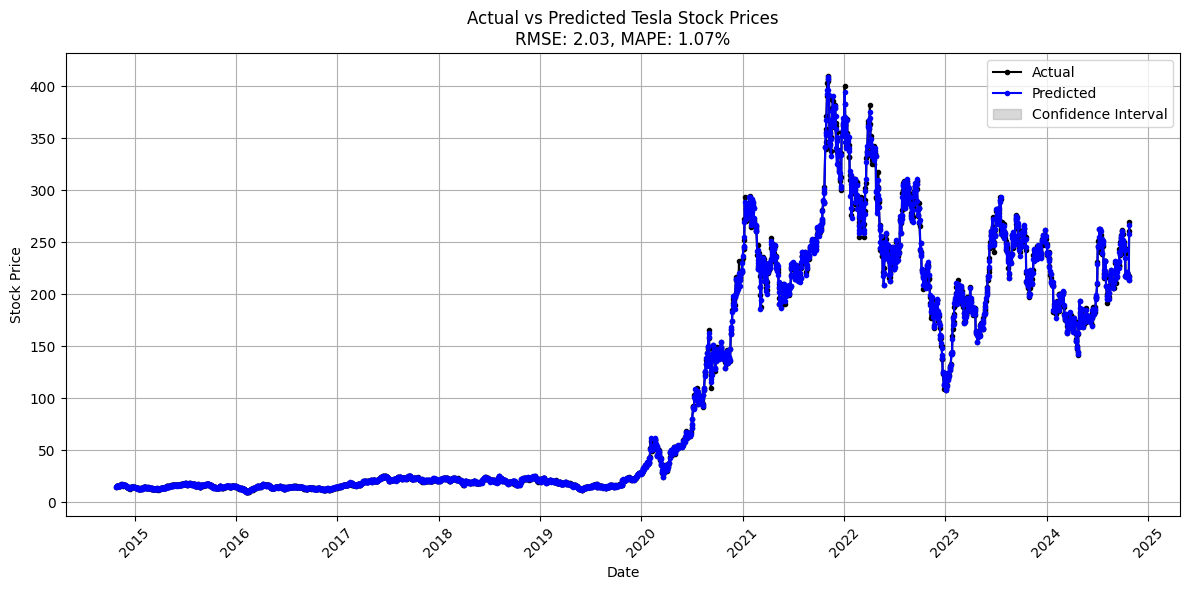

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import joblib  # To save and load the model

# Fetch Tesla Stock Price Data for the last 10 years
ticker = 'TSLA'
stock_data = yf.download(ticker, period='10y', interval='1d')

# Check if data was downloaded successfully
if stock_data.empty:
    raise ValueError("No data was downloaded from Yahoo Finance. Please check the ticker symbol or try a different interval.")

# Prepare the dataframe for Prophet with additional regressors
stock_data.reset_index(inplace=True)
stock_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Step 1: Create Prophet Model with Regressors (Open, High, Low, Volume)
model = Prophet(daily_seasonality=True, yearly_seasonality=True, changepoint_prior_scale=0.05)
model.add_regressor('Open')
model.add_regressor('High')
model.add_regressor('Low')
model.add_regressor('Volume')  # Add volume as a regressor

# Step 2: Prepare and Train the Model with Regressors
# Forward-fill any missing values in the regressors to avoid errors during training
stock_data[['Open', 'High', 'Low', 'Volume']] = stock_data[['Open', 'High', 'Low', 'Volume']].ffill()
model.fit(stock_data[['ds', 'y', 'Open', 'High', 'Low', 'Volume']])

# Step 3: Save the Trained Model
model_filename = 'prophet_tesla_model_with_regressors.pkl'
joblib.dump(model, model_filename)
print(f"Trained model saved as '{model_filename}'")

# Step 4: Create Future Dates for Predictions
future_dates = stock_data[['ds', 'Open', 'High', 'Low', 'Volume']]

# Step 5: Predict Prices
forecast = model.predict(future_dates)

# Step 6: Merge Actual and Predicted Values
comparison_df = pd.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], stock_data[['ds', 'y']], on='ds', how='inner')
comparison_df.rename(columns={'y': 'Actual', 'yhat': 'Predicted'}, inplace=True)

# Step 7: Calculate Accuracy Metrics (RMSE, MAE, MAPE)
rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Predicted']))
mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Predicted'])
mape = mean_absolute_percentage_error(comparison_df['Actual'], comparison_df['Predicted']) * 100

print(f"Model Accuracy Metrics:\nRMSE: {rmse}\nMAE: {mae}\nMAPE: {mape}%")

# Step 8: Plot Actual vs Predicted Prices with Confidence Intervals
def plot_comparison_with_confidence_intervals(comparison_df, rmse, mape):
    """
    Plots the actual vs predicted stock prices along with confidence intervals and accuracy metrics.
    """
    plt.figure(figsize=(12, 6))

    # Plot actual values
    plt.plot(comparison_df['ds'], comparison_df['Actual'], label='Actual', color='black', marker='o', markersize=3)

    # Plot predicted values
    plt.plot(comparison_df['ds'], comparison_df['Predicted'], label='Predicted', color='blue', marker='o', markersize=3)

    # Plot confidence intervals
    plt.fill_between(comparison_df['ds'], comparison_df['yhat_lower'], comparison_df['yhat_upper'],
                     color='gray', alpha=0.3, label='Confidence Interval')

    # Formatting the plot
    plt.title(f'Actual vs Predicted Tesla Stock Prices\nRMSE: {rmse:.2f}, MAPE: {mape:.2f}%')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()

    # Save the plot as an image file
    plt.savefig('tesla_actual_vs_predicted_with_confidence_intervals.png')
    plt.show()

# Step 9: Plot the actual vs predicted prices with confidence intervals and metrics
plot_comparison_with_confidence_intervals(comparison_df, rmse, mape)


[*********************100%***********************]  1 of 1 completed

DEBUG:cmdstanpy:input tempfile: /tmp/tmpetcy4aya/210n7ijf.json


DEBUG:cmdstanpy:input tempfile: /tmp/tmpetcy4aya/kegqxqk1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74776', 'data', 'file=/tmp/tmpetcy4aya/210n7ijf.json', 'init=/tmp/tmpetcy4aya/kegqxqk1.json', 'output', 'file=/tmp/tmpetcy4aya/prophet_modelwymhmh0q/prophet_model-20241026151104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Trained model saved as 'prophet_tesla_model_with_regressors.pkl'
Model Accuracy Metrics:
RMSE: 2.915212285555558
MAE: 2.0911700680986454
MAPE: 1.0542843475634434%


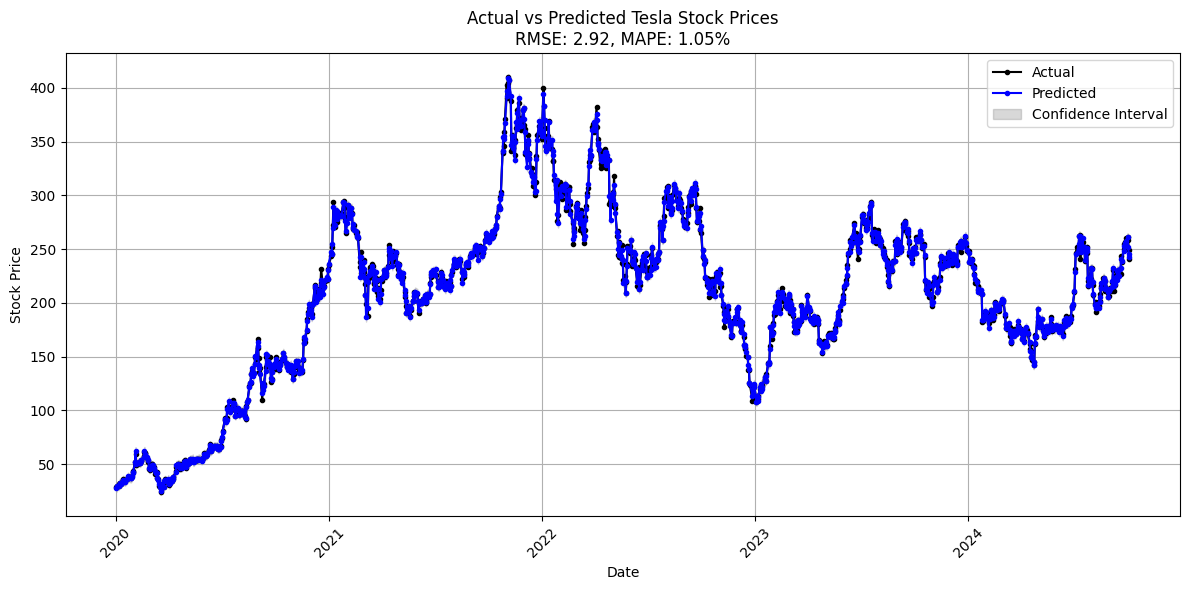

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import joblib  # To save and load the model

# Fetch Tesla Stock Price Data from 2010-01-01 to 2024-10-04
ticker = 'TSLA'
tesla_data = yf.download(ticker, start='2020-01-01', end='2024-10-04', interval='1d')

# Check if data was downloaded successfully
if tesla_data.empty:
    raise ValueError("No data was downloaded from Yahoo Finance. Please check the ticker symbol or try a different interval.")

# Prepare the dataframe for Prophet with additional regressors
tesla_data.reset_index(inplace=True)
tesla_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Step 1: Create Prophet Model with Regressors (Open, High, Low, Volume)
model = Prophet(daily_seasonality=True, yearly_seasonality=True, changepoint_prior_scale=0.05)
model.add_regressor('Open')
model.add_regressor('High')
model.add_regressor('Low')
model.add_regressor('Volume')  # Add volume as a regressor

# Step 2: Prepare and Train the Model with Regressors
# Forward-fill any missing values in the regressors to avoid errors during training
tesla_data[['Open', 'High', 'Low', 'Volume']] = tesla_data[['Open', 'High', 'Low', 'Volume']].ffill()
model.fit(tesla_data[['ds', 'y', 'Open', 'High', 'Low', 'Volume']])

# Step 3: Save the Trained Model
model_filename = 'prophet_tesla_model_with_regressors.pkl'
joblib.dump(model, model_filename)
print(f"Trained model saved as '{model_filename}'")

# Step 4: Create Future Dates for Predictions
future_dates = tesla_data[['ds', 'Open', 'High', 'Low', 'Volume']]

# Step 5: Predict Prices
forecast = model.predict(future_dates)

# Step 6: Merge Actual and Predicted Values
comparison_df = pd.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], tesla_data[['ds', 'y']], on='ds', how='inner')
comparison_df.rename(columns={'y': 'Actual', 'yhat': 'Predicted'}, inplace=True)

# Step 7: Calculate Accuracy Metrics (RMSE, MAE, MAPE)
rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Predicted']))
mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Predicted'])
mape = mean_absolute_percentage_error(comparison_df['Actual'], comparison_df['Predicted']) * 100

print(f"Model Accuracy Metrics:\nRMSE: {rmse}\nMAE: {mae}\nMAPE: {mape}%")

# Step 8: Plot Actual vs Predicted Prices with Confidence Intervals
def plot_comparison_with_confidence_intervals(comparison_df, rmse, mape):
    """
    Plots the actual vs predicted stock prices along with confidence intervals and accuracy metrics.
    """
    plt.figure(figsize=(12, 6))

    # Plot actual values
    plt.plot(comparison_df['ds'], comparison_df['Actual'], label='Actual', color='black', marker='o', markersize=3)

    # Plot predicted values
    plt.plot(comparison_df['ds'], comparison_df['Predicted'], label='Predicted', color='blue', marker='o', markersize=3)

    # Plot confidence intervals
    plt.fill_between(comparison_df['ds'], comparison_df['yhat_lower'], comparison_df['yhat_upper'],
                     color='gray', alpha=0.3, label='Confidence Interval')

    # Formatting the plot
    plt.title(f'Actual vs Predicted Tesla Stock Prices\nRMSE: {rmse:.2f}, MAPE: {mape:.2f}%')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()

    # Save the plot as an image file
    plt.savefig('tesla_actual_vs_predicted_with_confidence_intervals.png')
    plt.show()

# Step 9: Plot the actual vs predicted prices with confidence intervals and metrics
plot_comparison_with_confidence_intervals(comparison_df, rmse, mape)


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import joblib

# Step 1: Fetch Tesla Stock Price Data from 2010-01-01 to 2024-10-04
ticker = 'TSLA'
tesla_data = yf.download(ticker, start='2010-01-01', end='2024-10-04', interval='1d')

# Check if data was downloaded successfully
if tesla_data.empty:
    raise ValueError("No data was downloaded from Yahoo Finance. Please check the ticker symbol or try a different interval.")

# Prepare the dataframe for Prophet with additional regressors
tesla_data.reset_index(inplace=True)
tesla_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Fine-tune the Prophet model parameters
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.1,   # Increased flexibility in trend changepoints
    seasonality_prior_scale=0.5    # Increased seasonality control
)
model.add_regressor('Open')
model.add_regressor('High')
model.add_regressor('Low')
model.add_regressor('Volume')

# Step 2: Prepare and Train the Model with Regressors
tesla_data[['Open', 'High', 'Low', 'Volume']] = tesla_data[['Open', 'High', 'Low', 'Volume']].ffill()
model.fit(tesla_data[['ds', 'y', 'Open', 'High', 'Low', 'Volume']])

# Step 3: Save the Trained Model
model_filename = 'prophet_tesla_model_finetuned.pkl'
joblib.dump(model, model_filename)
print(f"Trained model saved as '{model_filename}'")

# Step 4: Create Future Dates for Predictions
future_dates = tesla_data[['ds', 'Open', 'High', 'Low', 'Volume']]

# Step 5: Predict Prices
forecast = model.predict(future_dates)

# Step 6: Merge Actual and Predicted Values
comparison_df = pd.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], tesla_data[['ds', 'y']], on='ds', how='inner')
comparison_df.rename(columns={'y': 'Actual', 'yhat': 'Predicted'}, inplace=True)

# Step 7: Calculate Accuracy Metrics (RMSE, MAE, MAPE)
rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Predicted']))
mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Predicted'])
mape = mean_absolute_percentage_error(comparison_df['Actual'], comparison_df['Predicted']) * 100

print(f"Model Accuracy Metrics:\nRMSE: {rmse}\nMAE: {mae}\nMAPE: {mape}%")

# Step 8: Plot Actual vs Predicted Prices with Confidence Intervals
def plot_comparison_with_confidence_intervals(comparison_df, rmse, mape):
    plt.figure(figsize=(12, 6))
    plt.plot(comparison_df['ds'], comparison_df['Actual'], label='Actual', color='red', marker='o', markersize=3)
    plt.plot(comparison_df['ds'], comparison_df['Predicted'], label='Predicted', color='blue', marker='o', markersize=3)
    plt.fill_between(comparison_df['ds'], comparison_df['yhat_lower'], comparison_df['yhat_upper'], color='blue', alpha=0.2)
    plt.title(f'Actual vs Predicted Tesla Stock Prices\nRMSE: {rmse:.2f}, MAPE: {mape:.2f}%')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Step 9: Plot the actual vs predicted prices with confidence intervals and metrics
plot_comparison_with_confidence_intervals(comparison_df, rmse, mape)


[*********************100%***********************]  1 of 1 completed

DEBUG:cmdstanpy:input tempfile: /tmp/tmpetcy4aya/8zbmlbi6.json


DEBUG:cmdstanpy:input tempfile: /tmp/tmpetcy4aya/2d51yr6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40842', 'data', 'file=/tmp/tmpetcy4aya/8zbmlbi6.json', 'init=/tmp/tmpetcy4aya/2d51yr6n.json', 'output', 'file=/tmp/tmpetcy4aya/prophet_modelzmjh24wj/prophet_model-20241026151445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Trained model saved as 'prophet_tesla_model_finetuned.pkl'
Model Accuracy Metrics:
RMSE: 1.6976493246922268
MAE: 0.7939734614136351
MAPE: 1.9578149959249354%


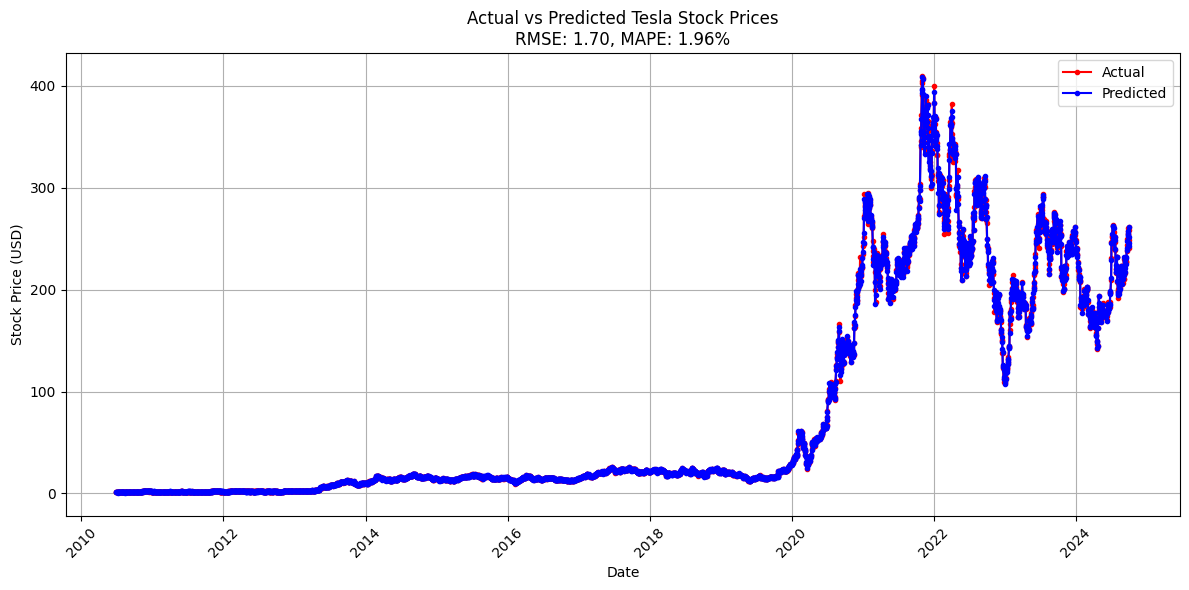

In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import joblib

# Step 1: Fetch Tesla Stock Price Data from 2010-01-01 to 2024-10-04
ticker = 'TSLA'
tesla_data = yf.download(ticker, start='2010-01-01', end='2024-10-04', interval='1d')

# Check if data was downloaded successfully
if tesla_data.empty:
    raise ValueError("No data was downloaded from Yahoo Finance. Please check the ticker symbol or try a different interval.")

# Prepare the dataframe for Prophet with additional regressors
tesla_data.reset_index(inplace=True)
tesla_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Fine-tune the Prophet model parameters
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.1,   # Increased flexibility in trend changepoints
    seasonality_prior_scale=0.5    # Increased seasonality control
)
model.add_regressor('Open')
model.add_regressor('High')
model.add_regressor('Low')
model.add_regressor('Volume')

# Step 2: Prepare and Train the Model with Regressors
tesla_data[['Open', 'High', 'Low', 'Volume']] = tesla_data[['Open', 'High', 'Low', 'Volume']].ffill()
model.fit(tesla_data[['ds', 'y', 'Open', 'High', 'Low', 'Volume']])

# Step 3: Save the Trained Model
model_filename = 'prophet_tesla_model_finetuned.pkl'
joblib.dump(model, model_filename)
print(f"Trained model saved as '{model_filename}'")

# Step 4: Create Future Dates for Predictions
future_dates = tesla_data[['ds', 'Open', 'High', 'Low', 'Volume']]

# Step 5: Predict Prices
forecast = model.predict(future_dates)

# Step 6: Merge Actual and Predicted Values
comparison_df = pd.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], tesla_data[['ds', 'y']], on='ds', how='inner')
comparison_df.rename(columns={'y': 'Actual', 'yhat': 'Predicted'}, inplace=True)

# Step 7: Calculate Accuracy Metrics (RMSE, MAE, MAPE)
rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df['Predicted']))
mae = mean_absolute_error(comparison_df['Actual'], comparison_df['Predicted'])
mape = mean_absolute_percentage_error(comparison_df['Actual'], comparison_df['Predicted']) * 100

print(f"Model Accuracy Metrics:\nRMSE: {rmse}\nMAE: {mae}\nMAPE: {mape}%")

# Step 8: Plot Actual vs Predicted Prices with Confidence Intervals
def plot_comparison_with_confidence_intervals(comparison_df, rmse, mape):
    plt.figure(figsize=(12, 6))
    plt.plot(comparison_df['ds'], comparison_df['Actual'], label='Actual', color='red', marker='o', markersize=3)
    plt.plot(comparison_df['ds'], comparison_df['Predicted'], label='Predicted', color='blue', marker='o', markersize=3)
    plt.fill_between(comparison_df['ds'], comparison_df['yhat_lower'], comparison_df['yhat_upper'], color='blue', alpha=0.2)
    plt.title(f'Actual vs Predicted Tesla Stock Prices\nRMSE: {rmse:.2f}, MAPE: {mape:.2f}%')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Step 9: Plot the actual vs predicted prices with confidence intervals and metrics
plot_comparison_with_confidence_intervals(comparison_df, rmse, mape)


[*********************100%***********************]  1 of 1 completed

DEBUG:cmdstanpy:input tempfile: /tmp/tmpetcy4aya/4p9xdxhq.json


DEBUG:cmdstanpy:input tempfile: /tmp/tmpetcy4aya/19mf2pty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8128', 'data', 'file=/tmp/tmpetcy4aya/4p9xdxhq.json', 'init=/tmp/tmpetcy4aya/19mf2pty.json', 'output', 'file=/tmp/tmpetcy4aya/prophet_modelphfuield/prophet_model-20241026151909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Fine-tuned model saved as 'prophet_tesla_model_finetuned_v2.pkl'
Model loaded successfully
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Model Accuracy Metrics:
RMSE: 2.5891793562310146
MAE: 1.9994062498127618
MAPE: 0.8338608589932295%
Actual vs Predicted data saved to 'tesla_actual_vs_predicted_oct_7_to_11_2024.csv'


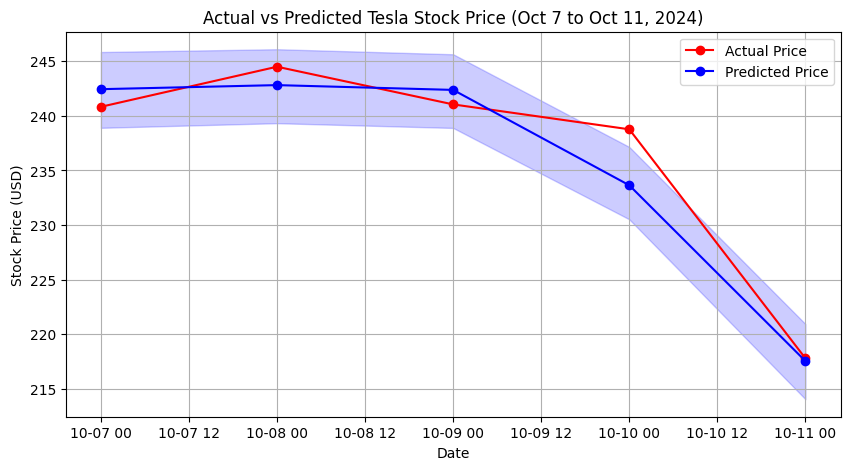

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import joblib

# Step 1: Fetch Tesla Stock Price Data (Last 5 years for recency)
ticker = 'TSLA'
tesla_data = yf.download(ticker, start='2019-01-01', end='2024-10-04', interval='1d')

# Check if data was downloaded successfully
if tesla_data.empty:
    raise ValueError("No data was downloaded from Yahoo Finance. Please check the ticker symbol or try a different interval.")

# Prepare the dataframe for Prophet with additional regressors
tesla_data.reset_index(inplace=True)
tesla_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Step 2: Create and Fine-Tune Prophet Model with Regressors and Seasonality
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.1,  # Adjusted for better trend adaptability
    seasonality_prior_scale=1.0   # Adjusted for flexibility in seasonality
)

# Adding monthly seasonality to capture periodic trends better
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Add additional regressors
model.add_regressor('Open')
model.add_regressor('High')
model.add_regressor('Low')
model.add_regressor('Volume')

# Step 3: Train the Model with Regressors
# Forward-fill any missing values in the regressors to avoid errors during training
tesla_data[['Open', 'High', 'Low', 'Volume']] = tesla_data[['Open', 'High', 'Low', 'Volume']].ffill()
model.fit(tesla_data[['ds', 'y', 'Open', 'High', 'Low', 'Volume']])

# Step 4: Save the Fine-Tuned Model using joblib
model_filename = 'prophet_tesla_model_finetuned_v2.pkl'
joblib.dump(model, model_filename)
print(f"Fine-tuned model saved as '{model_filename}'")

# Step 5: Load the Model using joblib
loaded_model = joblib.load(model_filename)
print("Model loaded successfully")

# Step 6: Create a future DataFrame for predictions (Oct 7 to Oct 11, 2024)
future_dates = pd.date_range(start="2024-10-07", end="2024-10-11", freq='D')
future = pd.DataFrame(future_dates, columns=['ds'])

# Fetching actual data for October 7-11, 2024 to populate regressor values
future_data = yf.download('TSLA', start="2024-10-07", end="2024-10-12")  # end date is exclusive
future_data.reset_index(inplace=True)
future_data = future_data[['Date', 'Open', 'High', 'Low', 'Volume']]
future_data.rename(columns={'Date': 'ds'}, inplace=True)

# Merge future dates with the required regressors
future = future.merge(future_data, on='ds', how='left')

# Step 7: Predict Future Prices using the Loaded Model
forecast = loaded_model.predict(future)

# Step 8: Fetch Actual Prices from yfinance for Oct 7 to Oct 11, 2024
actual_data = yf.download('TSLA', start="2024-10-07", end="2024-10-12")  # end date is exclusive
actual_data.reset_index(inplace=True)
actual_data = actual_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'actual'})

# Step 9: Merge Actual Prices with Forecasted Values
forecast = forecast.merge(actual_data, on='ds', how='left')

# Step 10: Calculate Accuracy Metrics (RMSE, MAE, MAPE) for the Specified Date Range
rmse = np.sqrt(mean_squared_error(forecast['actual'], forecast['yhat']))
mae = mean_absolute_error(forecast['actual'], forecast['yhat'])
mape = mean_absolute_percentage_error(forecast['actual'], forecast['yhat']) * 100

print(f"Model Accuracy Metrics:\nRMSE: {rmse}\nMAE: {mae}\nMAPE: {mape}%")

# Step 11: Save the Actual vs Predicted Data to a CSV File
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'actual']].to_csv('tesla_actual_vs_predicted_oct_7_to_11_2024.csv', index=False)
print("Actual vs Predicted data saved to 'tesla_actual_vs_predicted_oct_7_to_11_2024.csv'")

# Step 12: Plot the Actual vs Predicted Prices with Confidence Intervals
plt.figure(figsize=(10, 5))
plt.plot(forecast['ds'], forecast['actual'], marker='o', color='r', label='Actual Price')
plt.plot(forecast['ds'], forecast['yhat'], marker='o', color='b', label='Predicted Price')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)
plt.title("Actual vs Predicted Tesla Stock Price (Oct 7 to Oct 11, 2024)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


Model loaded successfully
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:291: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/yfinance/base.py:291: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Dividends"].fillna(0, inplace=True)
/usr/local/lib/p

[*********************100%***********************]  1 of 1 completed

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:291: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/yfinance/base.py:291: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Dividends"].fillna(0, inplace=True)
/usr/local/lib/p


Prediction Accuracy Metrics for Specified Date Range:
RMSE: 2.5891793562310146
MAE: 1.9994062498127618
MAPE: 0.8338608589932295%
Actual vs Predicted data saved to 'tesla_actual_vs_predicted_oct_7_to_11_2024.csv'


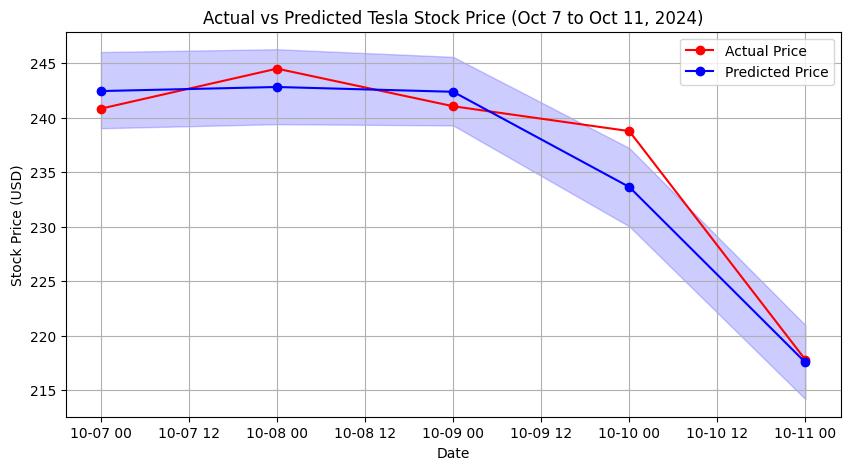

In [3]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import yfinance as yf
import joblib

# Step 1: Load the Fine-Tuned Model
model_filename = 'prophet_tesla_model_finetuned_v2.pkl'
loaded_model = joblib.load(model_filename)
print("Model loaded successfully")

# Step 2: Create Future Dates for Predictions (Oct 7 to Oct 11, 2024)
future_dates = pd.date_range(start="2024-10-07", end="2024-10-11", freq='D')
future = pd.DataFrame(future_dates, columns=['ds'])

# Step 3: Fetch Regressor Data (Open, High, Low, Volume) for Oct 7 to Oct 11, 2024
regressor_data = yf.download('TSLA', start="2024-10-07", end="2024-10-12")  # End date is exclusive
regressor_data.reset_index(inplace=True)
regressor_data = regressor_data[['Date', 'Open', 'High', 'Low', 'Volume']].rename(columns={'Date': 'ds'})

# Merge the regressor data with future dates
future = future.merge(regressor_data, on='ds', how='left')

# Step 4: Predict Using the Loaded Model
forecast = loaded_model.predict(future)

# Step 5: Fetch Actual Prices for Comparison
actual_data = yf.download('TSLA', start="2024-10-07", end="2024-10-12")
actual_data.reset_index(inplace=True)
actual_data = actual_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'actual'})

# Step 6: Merge Actual Prices with Forecasted Values
forecast = forecast.merge(actual_data, on='ds', how='left')

# Step 7: Calculate Accuracy Metrics (RMSE, MAE, MAPE)
rmse = np.sqrt(mean_squared_error(forecast['actual'], forecast['yhat']))
mae = mean_absolute_error(forecast['actual'], forecast['yhat'])
mape = mean_absolute_percentage_error(forecast['actual'], forecast['yhat']) * 100

print(f"Prediction Accuracy Metrics for Specified Date Range:\nRMSE: {rmse}\nMAE: {mae}\nMAPE: {mape}%")

# Step 8: Save Actual vs Predicted Data to a CSV File
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'actual']].to_csv('tesla_actual_vs_predicted_oct_7_to_11_2024.csv', index=False)
print("Actual vs Predicted data saved to 'tesla_actual_vs_predicted_oct_7_to_11_2024.csv'")

# Step 9: Plot the Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(forecast['ds'], forecast['actual'], marker='o', color='r', label='Actual Price')
plt.plot(forecast['ds'], forecast['yhat'], marker='o', color='b', label='Predicted Price')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)
plt.title("Actual vs Predicted Tesla Stock Price (Oct 7 to Oct 11, 2024)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


Model loaded successfully
[*********************100%***********************]  1 of 1 completed

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:291: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/yfinance/base.py:291: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Dividends"].fillna(0, inplace=True)
/usr/local/lib/p


Actual values found and used.
Unable to calculate metrics as actual values are missing.
Actual vs Predicted data saved to 'tesla_actual_vs_predicted_oct_7_2024.csv'


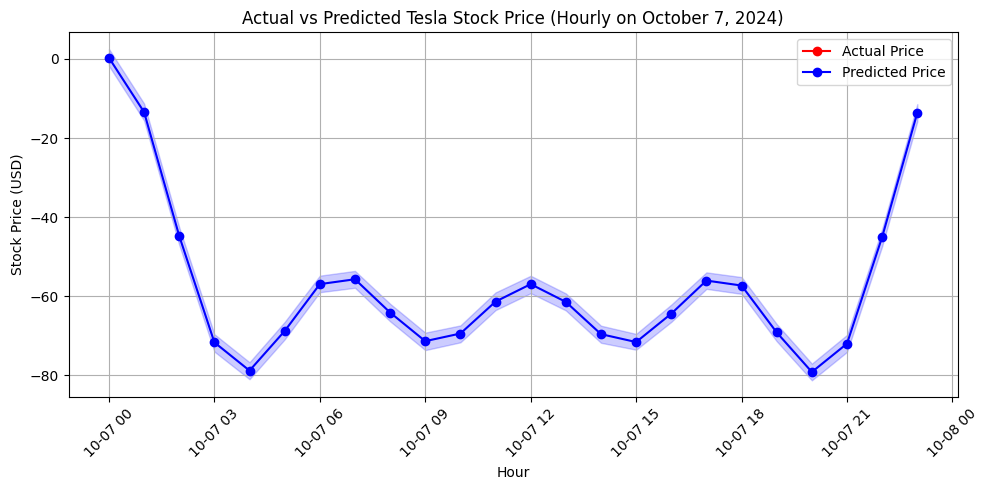

In [17]:
import joblib
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load the pre-trained model
model_filename = 'prophet_tesla_model_finetuned_v3.pkl'
loaded_model = joblib.load(model_filename)
print("Model loaded successfully")

# Create future DataFrame for predictions on October 7, 2024 (hourly)
future_dates = pd.date_range(start="2024-10-07", end="2024-10-07 23:00:00", freq='h')  # lowercase 'h'
future = pd.DataFrame(future_dates, columns=['ds'])
future['Open'] = 0  # Placeholder values for regressors
future['High'] = 0
future['Low'] = 0
future['Volume'] = 0

# Predict prices for October 7, 2024, using the loaded model
forecast = loaded_model.predict(future)

# Fetch actual prices for October 7, 2024 (hourly data)
actual_data = yf.download('TSLA', start="2024-10-07", end="2024-10-08", interval='60m')
actual_data.reset_index(inplace=True)
actual_data.rename(columns={'Datetime': 'ds', 'Close': 'actual'}, inplace=True)
actual_data['ds'] = actual_data['ds'].dt.tz_localize(None)  # Remove timezone info

# Check if actual data is available
if actual_data.empty:
    print("No actual values available for October 7, 2024.")
else:
    print("Actual values found and used.")
    # Interpolate missing values in the actual data
    actual_data.set_index('ds', inplace=True)
    actual_data = actual_data.reindex(future_dates).interpolate().reset_index()
    actual_data.rename(columns={'index': 'ds'}, inplace=True)

# Merge actual prices with forecasted values
forecast = forecast.merge(actual_data[['ds', 'actual']], on='ds', how='left')

# Calculate accuracy metrics if actual data is available
if not forecast['actual'].isna().all():
    rmse = np.sqrt(mean_squared_error(forecast['actual'], forecast['yhat']))
    mae = mean_absolute_error(forecast['actual'], forecast['yhat'])
    mape = mean_absolute_percentage_error(forecast['actual'], forecast['yhat']) * 100
    print(f"Model Accuracy Metrics for October 7, 2024:\nRMSE: {rmse}\nMAE: {mae}\nMAPE: {mape}%")
else:
    print("Unable to calculate metrics as actual values are missing.")

# Save actual vs predicted data to CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'actual']].to_csv('tesla_actual_vs_predicted_oct_7_2024.csv', index=False)
print("Actual vs Predicted data saved to 'tesla_actual_vs_predicted_oct_7_2024.csv'")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(forecast['ds'], forecast['actual'], marker='o', color='r', label='Actual Price')
plt.plot(forecast['ds'], forecast['yhat'], marker='o', color='b', label='Predicted Price')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)
plt.title("Actual vs Predicted Tesla Stock Price (Hourly on October 7, 2024)")
plt.xlabel("Hour")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
